In [ ]:
classifier 를 여러개 만들건데 그 중에서 optimal classifier 를 만들기 위해서 우리가 해줘야 할 것
우리 모델이 함수 f일 때 수많은 f를 만들건데 f에서 나오는 예측값이 실제값이랑 일치하지 않는 확률을 최소화해주는 f를 찾던지,
아니면 우리가 만든 f가 실제값이랑 같을 확률을 높이던지 둘 중 하나의 방법으로 optimal classifier 를 고름

결정경계면은 linear 한 선을 그리거나, sigmoid 계열의 비선형으로 만들 수도 있음. 그 결정 경계면을 만들어내는 함수의 모양 보다는,
어떻게 하면 주어진 데이터를 가지고 실제값을 잘 예측할 수 있게끔 우리 모델을 설계할 것인가.

확률을 추정하기 위해서 MLE, MAP 가 있었음. MLE 는 주어진 데이터셋에 의해서 우도. 주어진 데이터셋을 잘 관측하게
MAP는 베이즈 이론을 이용해서 선후관계를 뒤바꿔서 사전확률과 우도를 곱해서 사후확률을 만들어내는 식으로 사후확률을 최대화. 이때 주어진 데이터셋은
충분하지 않고 노이즈도 껴있을 수 있어서 우도 만으로 충분히 우리 모델이 좋은 결과를 만들어낸다고 보장할 수 없기 때문에 사전확률을 곱해서
데이터셋이 있을 때 세타를 잘 예측하게 하는 형태로 가겠다는 것. 그렇게 optimal 한 classifier 를 구해보자!

일상생활에서 벌어지는 모든 케이스를 담을 정도의 커다란 데이터셋을 못구함. 그래서 가정을 해야한다. 모든 combination 도 못 만듦. 계산 가능하도록
몇가지 가정을 적용하자. 그 중 하나가 naive bayes assumption

In [ ]:
작은 데이터 셋에서도 combination 이 많이 만들어짐 -> 속성의 경우의 수
사전확률을 MLE 를 가지고 만들어낼 수 있음. P(Y=y) 이 사전확률 정보가 likelihood에 곱해져서 사후확률을 만들어냄.
사전확률이 곱해지면 좀 더 정교해짐. 모든 combination 이 빈도에 따라 많이 나오거나 해서 확률이 부정확하게 나오는데 사전확률이 보정해주는 역할을
함. 따라서 단순히 데이터만 이용하는 것보다 좀 더 나은 형태임. 이게 best 는 아닐 지라도 수많은 f 중에 제일 괜찮은 애가 됨. 이것을 optimal 하게
끔 주어진 데이터셋 안에서만 optimal classifier 를 만들어 낼 수 있을 것.

In [ ]:
이걸 어떻게 assumption 을 이용해서 간단하게 만들까?
사전확률은 단순하게 MLE를 통해서 만든다고 가정.
그러면 우리의 주 목적은 P(X=x|Y=y)-combination 를 가지고 어떻게 확률을 추정할까
특정 사전확률이 주어졌을 때 특정 combination 이 주어질 확률 이것이 likelihood 가 됨.
이것을 계산하기 위해서 얼마만큼의 많은 파라미터, combination 을 만족하는 데이터셋이 필요할까?

(한 속성의 종류 개수 x 한 속성의 종류 개수 - 1) x 클래수 개수

즉 어찌저찌 엄청 많은 것. 

In [ ]:
그러면 assumption 을 하나 정의
학습을 하기 위해서는 매우 큰 데이터셋이 필요한데 이걸 얻는 게 불가능 함. 그래서 학습을 할 수 없음
왜? 데이터셋이 앞으로도 발목을 잡을 텐데 우리가 데이터셋이라 부르는 것들은 정말 많음. 하나의 데이터셋을 만들어내기 위해서는 시간의 흐름에 따라서
데이터가 계속해서 생기기 때문에 이 순간 까지의 데이터를 모았다 쳐도 이미 시간은 흐르고 새로운 데이터가 생겨서 언제나 모든 데이터를 모으는 것은 불
가능함.
그렇다고 해서 이걸 안할거냐? 최대한 계산이 가능하도록, 가능한 형태로 만들어야 한다!

결국엔 combination 들이 지수의 형태로 늘어나서 발목을 잡음. 그러면 지수의 형태가 안나타나도록 해줘야 함. 그래서 naive 한 assumption 을 담.

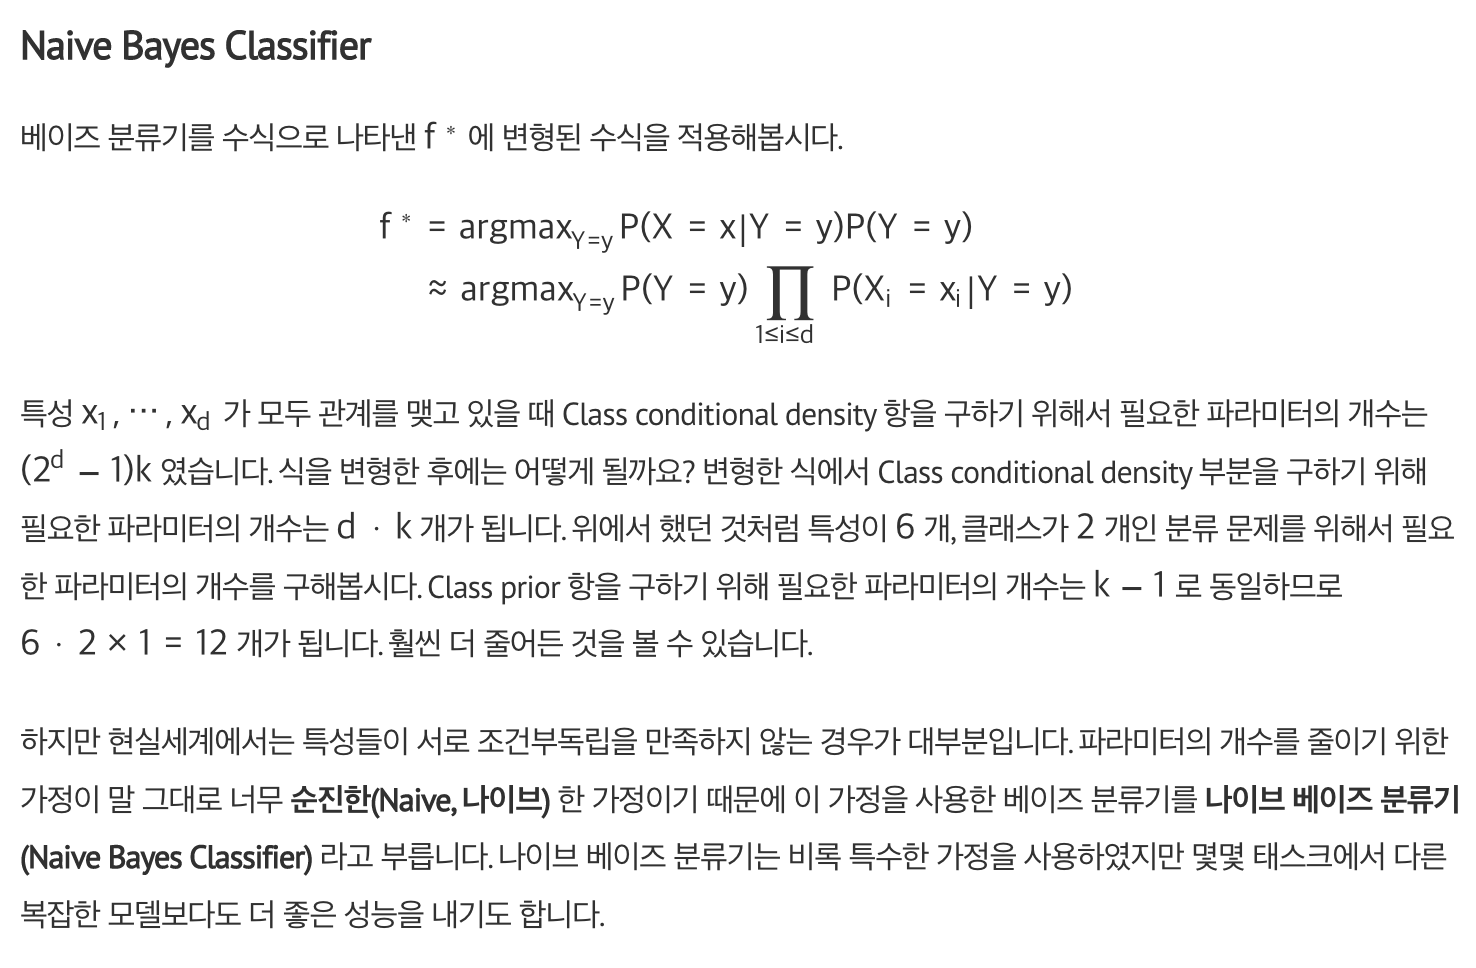

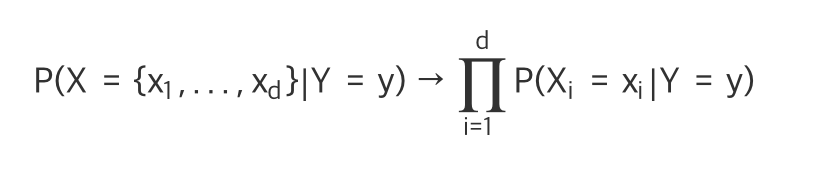

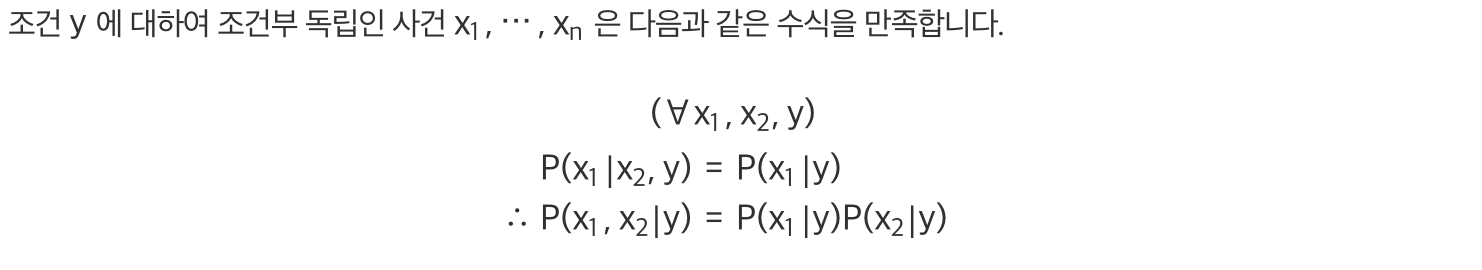

In [ ]:
데이터를 실질적으로 수집할 수 없다는 제약이 있음에도, 모든 데이터셋을 다 구했다고 쳐보자!
그러면 모든 케이스를 담을거니까 지수는 계속해서 커짐. 그러면 combination 때문에 계산할 수 없고, 계산하기 위해서는 많은 데이터셋이 필요한데 그게
어폐가 있음.
지수 때문에 그러면 데이터셋을 줄여야 함. 그러면 combination 을 만들어낼 수 없음.
그래서 이 모델이 가치를 가지는 이유는, 데이터셋이 많을 때 계산이 불가능함에도 불구하고 그것을 assumption 을 통해서 해결했다는 것.
그 가정이 결국에는 독립이라고 가정할 것임. 그것이 BoW의 단어의 출현 확률이 독립적이라는 가정과 일치해서 텍스트 분야에서 쓰기에 괜찮은 모델이 됨

그래서 independence 를 가정할 것. 특히 조건부 독립.
조건부 독립을 가정해보자! 조건부 독립이 적용이 됐다고 하면 combination 이 combination 을 이루어서 확률이 이루어졌지만 개별 속성들이 독립적
확률을 가지기 때문에, 각 속성이 일어날 확률이 서로 다르게 되고 서로에게 영향을 미치지 않게 됨.

In [ ]:
실제 세계에서는 강한 상관관계가 있어서 이러한 가정은 옳지 않음. 그러나 combination 을 계산하기 위해서 독립을 가정할 것.
결합확률을 계산했을 때 개별확률의 곱으로 나타나는 것을 서로 독립이라고 말함.
위처럼 곱의 확률로 떨어질 수 있는 이유는 독립이라서.
조건이 y 일 때 둘이 독립이라 서로에게 영향을 주지 않기 때문에, combination 을 계산할 필요가 없음. 개별확률이기 때문. 위 그림에서 마지막 식.
따라서 두 확률의 곱으로 표현할 수 있음 -> 이렇게 되면 확률이 간단해짐. 계산 가능해서 모델 표현 가능
데이터셋만 가지고 확률을 잘 추정하는 모델을 찾는 것이 optimal 한 classifier 를 찾는 것

예를 들면
P(스팸|광고,대출) = P(광고,대출|스팸)P(스팸)
P(광고,대출|스팸) = P(광고|스팸)P(대출|스팸)  <- 이게 조건부 독립

이 가정이 굉장히 중요함

In [ ]:
conditional(조건부독립) vs Marginal(그냥 독립)

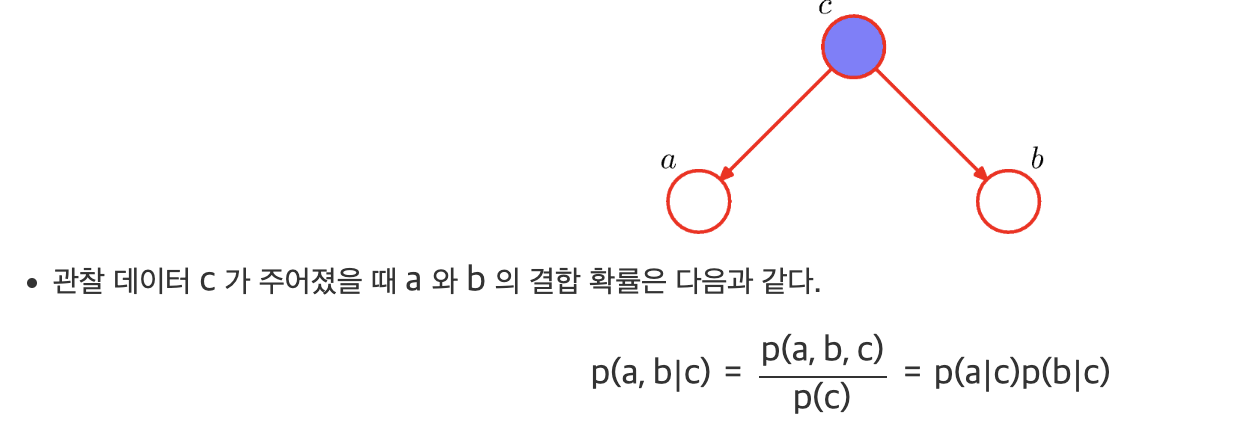

In [ ]:
왜 나이브? y가 주어졌을 때 x에 대한 combination 을 의존이 있지만 독립이라고 가정하자! 그게 조건부 독립을 가정.
근데 그게 실제 현실세계에서는 의존이 존재하지만 독립이라고 naive 하게 가정했기 때문.
이 때 classifier 를 여러개 만들 수 있는데, 이 때 어떻게 optimal 한 classifier 를 찾을 수 있는지도 알 수 있을 것.

In [ ]:
조건부 독립을 하면 파라미터 개수가 몇개가 되든 엄청나게 간단하게 됨.
나이브베이즈 분류기는 optimal 함
왜냐면 실제값일 확률을 최대화하도록 수식을 만들어줬기 때문. 다른 분류기도 있을 것. 다른 것들은 MLE 를 가지고 만들었다면 데이터셋에 따라 바뀔 것.
그러면 새로운 데이터가 들어오거나 노이즈가 있으면 다른 형태의 성능을 가지는 분류기가 만들어질 것.
그런데 나이브베이즈 분류기는 실제값이 맞을 확률을 최대화 하도록 해줌

In [ ]:
그런데 Naive assumption 이 문제가 있음.
실제 세상에서는 x 들 간에 상관관계가 존재함. 그러나 강제로 조건부 독립을 가정함. 이제 무시되어 문제가 됨.
그러면 correlation 을 하는 다른 모델을 찾으면 됨. 특히 텍스트에서는 말에 순서가 있어서 영향이 무조건 있음.

In [ ]:
또 다른 문제는 확률을 추정하는데 부정확함. 확률 추정하는데 MLE, MAP 가 있는데
전자는 충분치 않은 데이터셋 때문에 부정확
후자는 사전확률이 많은 영향을 끼치는데 그 사전확률을 잘못 만들어서 문제가 있음.
-> 이것들은 근본적으로 가지고 있는 문제들임. 이것들은 항상 풀어야 하는 숙제들임

따라서 naive assumption 에 대해서만 생각을 해보자

In [ ]:
항상 로그를 씌움 -> 곱에 sum 으로 바뀜 -> 확률이 maximize 되는 지점과 로그 func 에서 maximize 를 찾는 것은 같다고 봄.
그래서 실제 계산할 때는 Log를 씌움.
즉 사전확률 로그값 곱하기 (각각의 확률에 대한 로그값) 이렇게 됨. 정확한 확률을 찾는 게 문제가 아니라 확률이 최대화 되는 지점을 찾는 것.
그래서 실제 계산을 이렇게 해도 됨

다시, log 를 씌우는 이유는 monotonic 한 func 이기 때문. 딥러닝에서 log 가 들어가면 그냥 씌운 게 아니라 원 식이 있는데 계산의 편의성을 위
해서 씌웠을 것. 특히 역전파에서. 특히 softmax 를 withloss 로 취할 때.

논문을 보면 아키텍쳐를 보면서 선이 어디로 시작해서 어디로 들어가는지를 잘 봐야 함. residual connection 등. 정보를 잃지 말라고 초기값을 한번
더 결과단에 보내주기도 함.
시계열에서는 자기회귀라서 이런 treatment 를 잘 안씀. RNN 계열의 모델을 보면 dropout 도 없고 층을 딥하게 쌓지도 않음.
물론 attention 으로 넘어가면 얘기가 다름

In [ ]:
내일은 naive bayes 실습해볼 것

In [ ]:
일반메일과 스팸메일을 수집해야 함. 이미 있을 것 -> 그 코드를 챙겨오기!!